In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('patient.csv')
df

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5323,5324,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5324,5325,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5325,5326,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5326,5327,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated


In [3]:
df.describe()

,id,birth_year,infection_order,infected_by,contact_number
count,5328.000000,370.000000,35.000000,70.000000,47.000000
mean,2664.500000,1973.589189,2.285714,379.000000,72.978723
std,1538.205448,17.560546,1.405272,540.247528,188.155288
min,1.000000,1932.000000,1.000000,3.000000,0.000000
25%,1332.750000,1960.000000,1.000000,29.250000,2.500000
50%,2664.500000,1974.000000,2.000000,126.000000,16.000000
75%,3996.250000,1987.750000,3.000000,563.250000,46.000000
max,5328.000000,2018.000000,6.000000,2621.000000,1160.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5328 entries, 0 to 5327
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5328 non-null   int64  
 1   sex               383 non-null    object 
 2   birth_year        370 non-null    float64
 3   country           5328 non-null   object 
 4   region            371 non-null    object 
 5   group             81 non-null     object 
 6   infection_reason  140 non-null    object 
 7   infection_order   35 non-null     float64
 8   infected_by       70 non-null     float64
 9   contact_number    47 non-null     float64
 10  confirmed_date    5328 non-null   object 
 11  released_date     32 non-null     object 
 12  deceased_date     20 non-null     object 
 13  state             5328 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 582.9+ KB


In [8]:
df.index

RangeIndex(start=0, stop=5328, step=1)

In [6]:
df.shape

(5328, 14)

In [9]:
df.columns

Index(['id', 'sex', 'birth_year', 'country', 'region', 'group',
       'infection_reason', 'infection_order', 'infected_by', 'contact_number',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')

In [10]:
df.count()

id                  5328
sex                  383
birth_year           370
country             5328
region               371
group                 81
infection_reason     140
infection_order       35
infected_by           70
contact_number        47
confirmed_date      5328
released_date         32
deceased_date         20
state               5328
dtype: int64

In [12]:
df.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [13]:
df.tail()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
5323,5324,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5324,5325,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5325,5326,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5326,5327,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5327,5328,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated


In [15]:
df.isnull().sum() 

id                     0
sex                 4945
birth_year          4958
country                0
region              4957
group               5247
infection_reason    5188
infection_order     5293
infected_by         5258
contact_number      5281
confirmed_date         0
released_date       5296
deceased_date       5308
state                  0
dtype: int64

In [16]:
df.sort_index()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5323,5324,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5324,5325,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5325,5326,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5326,5327,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated


In [17]:
df['sex'].value_counts()

female    194
male      189
Name: sex, dtype: int64

Applying Lambda function to change the sex from male and female to 1 and 0 respectively




In [18]:
df.sex = df.sex.apply(lambda X : 0 if X == 'female' else 1) 
df.head(5)

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,0,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,1,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,1,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,1,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,1,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5328.0,2664.500000,1538.205448,1.0,1332.75,2664.5,3996.25,5328.0
sex,5328.0,0.963589,0.187329,0.0,1.00,1.0,1.00,1.0
birth_year,370.0,1973.589189,17.560546,1932.0,1960.00,1974.0,1987.75,2018.0
infection_order,35.0,2.285714,1.405272,1.0,1.00,2.0,3.00,6.0
infected_by,70.0,379.000000,540.247528,3.0,29.25,126.0,563.25,2621.0
contact_number,47.0,72.978723,188.155288,0.0,2.50,16.0,46.00,1160.0


# **Data Visualization**

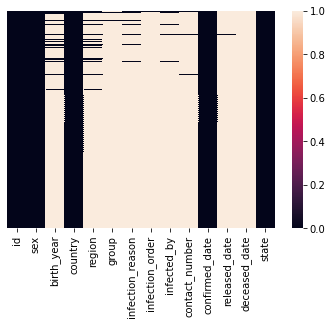

In [20]:
sns.heatmap(df.isnull(), yticklabels = False)
#checking NULl Values via graph,where you can find yellow colour which means that column contains NUll values

In [0]:
#sns.set(rc={'figure.figsize':(10,8)})

Text(0.5, 1.0, 'Regions affected Overall')

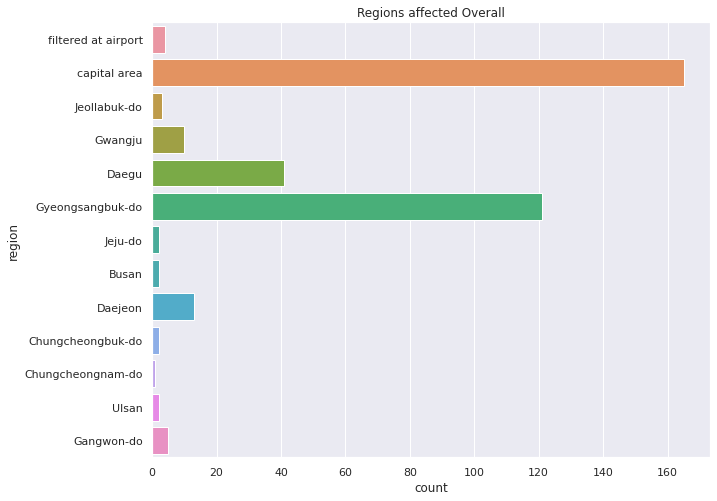

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(y=df['region'],).set_title('Regions affected Overall') # Ploting graph which regions maximum number of affected peole


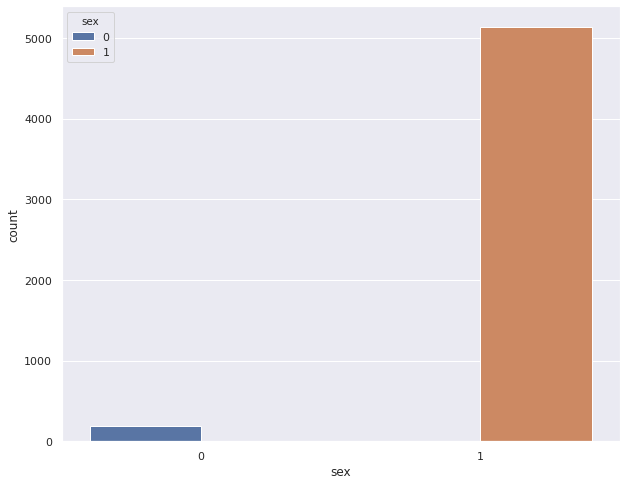

In [40]:
sns.countplot(x='sex',data=df, hue='sex')

Which country have maximum number of affected people


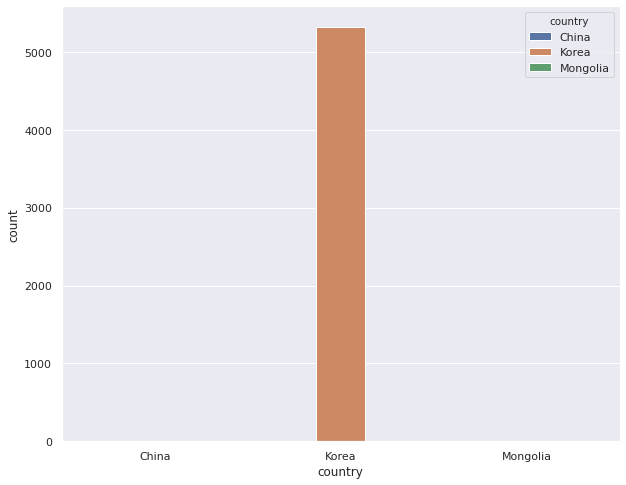

In [38]:
sns.countplot(x='country',data=df, hue='country')

 
Ploting Graph which area maximum number of affected people in country.

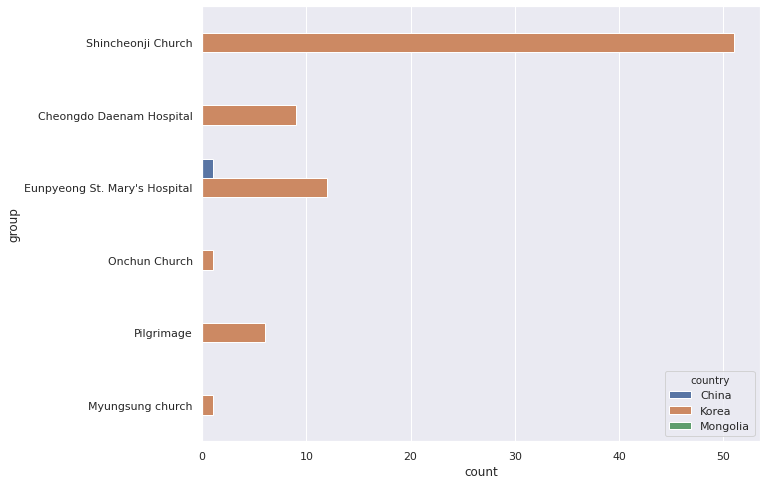

In [36]:
sns.countplot(y='group',data=df, hue='country') 

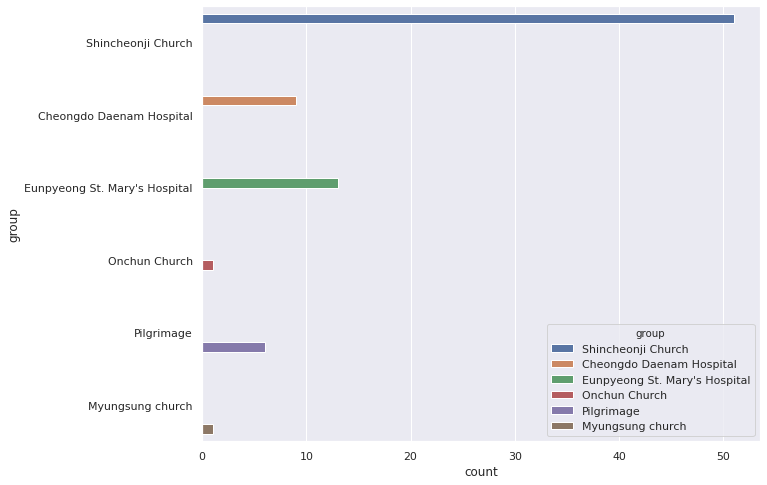

In [41]:
sns.countplot(y='group',data=df, hue='group');

Confirmed Patients 

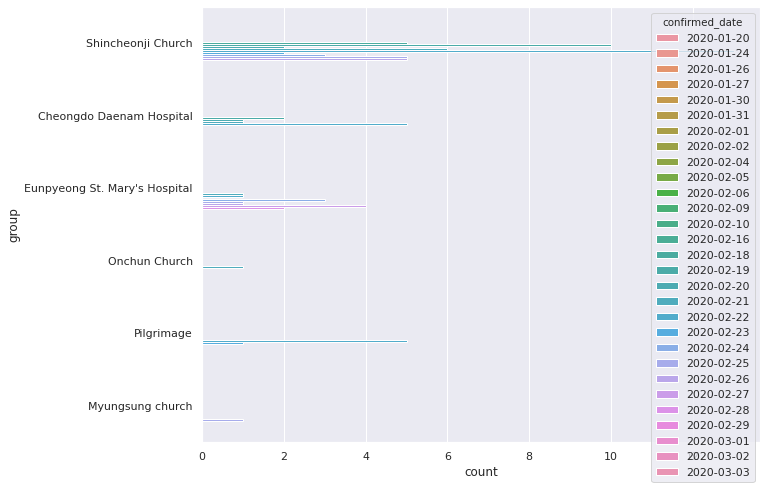

In [42]:
plt.figure(figsize=(10,8))
sns.countplot(y='group',data=df, hue='confirmed_date');

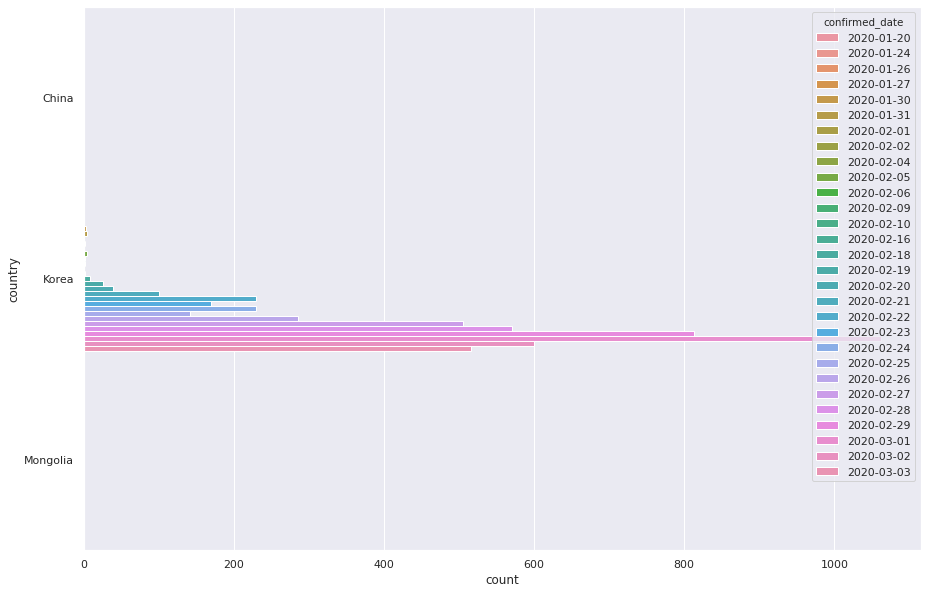

In [43]:
plt.figure(figsize=(15,10))
sns.countplot(y='country',data=df, hue='confirmed_date');

Ploting the graph confirmed date of the human infected or not in the Korea Country

Text(0.5, 1.0, 'Confirmed dates in Korea')

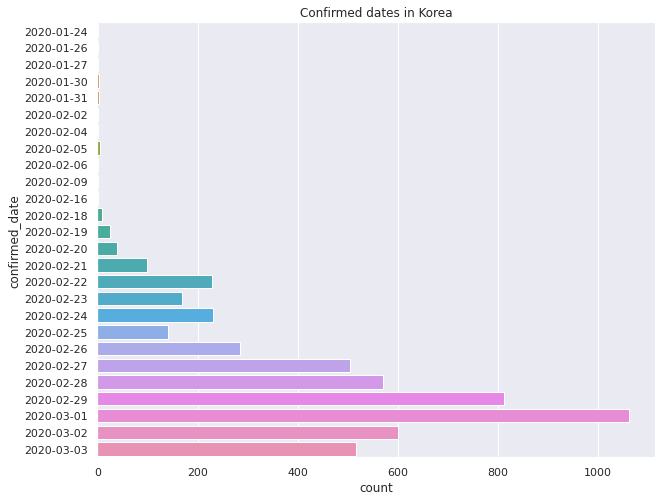

In [46]:
plt.figure(figsize=(10,8))
sns.countplot(y=df['confirmed_date'].loc[(df['country']=="Korea")],).set_title('Confirmed dates in Korea')  

Ploting the graph confirmed date of the human infected or not in the China Country


Text(0.5, 1.0, 'Confirmed dates in China')

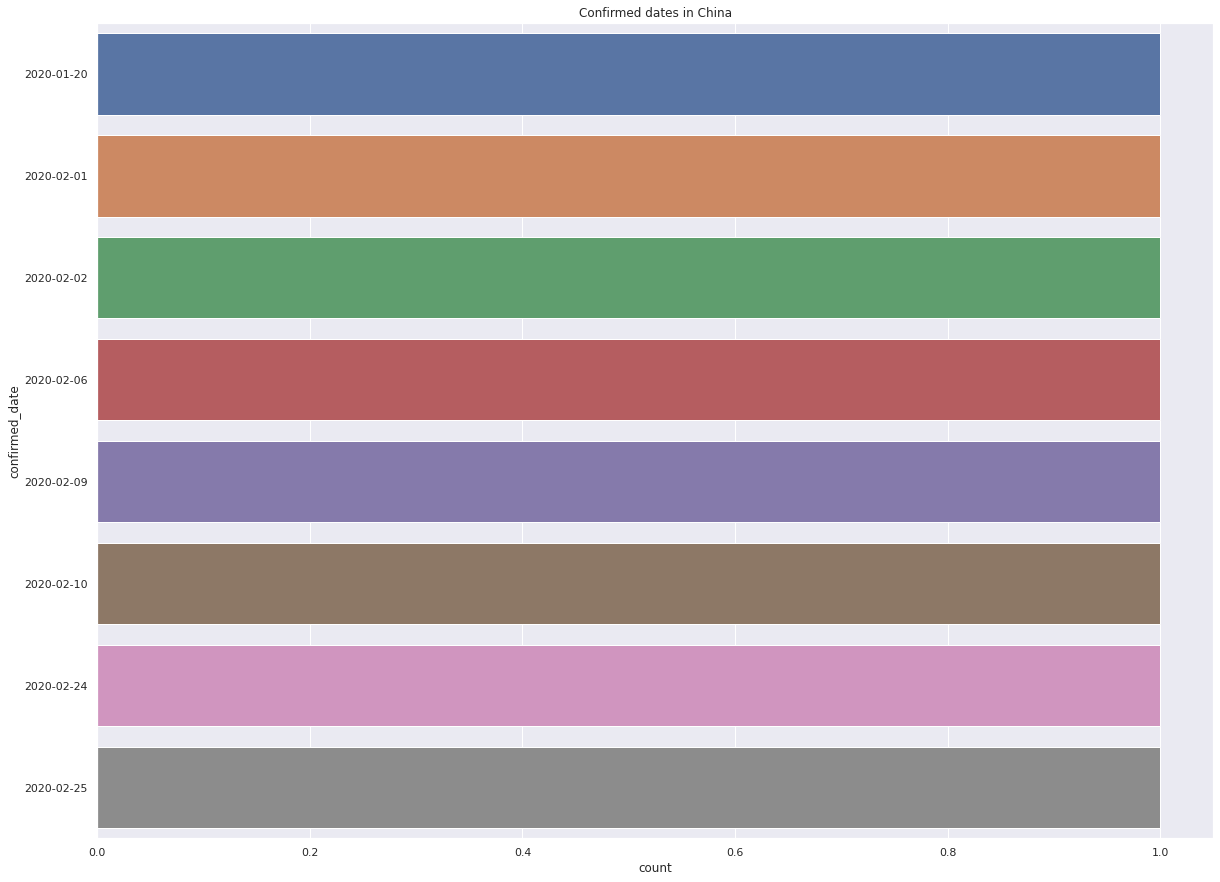

In [48]:
plt.figure(figsize=(20,15))
sns.countplot(y=df['confirmed_date'].loc[(df['country']=="China")],).set_title('Confirmed dates in China')

Ploting the graph confirmed date of the human infected or not in the Mongloia Country

ERROR! Session/line number was not unique in database. History logging moved to new session 62


Text(0.5, 1.0, 'Confirmed dates in Mongloia')

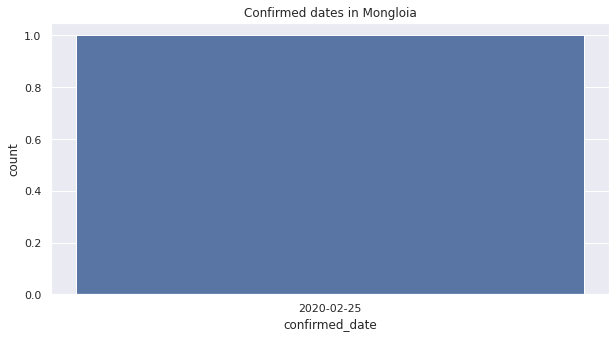

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['confirmed_date'].loc[(df['country']=="Mongolia")],).set_title('Confirmed dates in Mongloia')

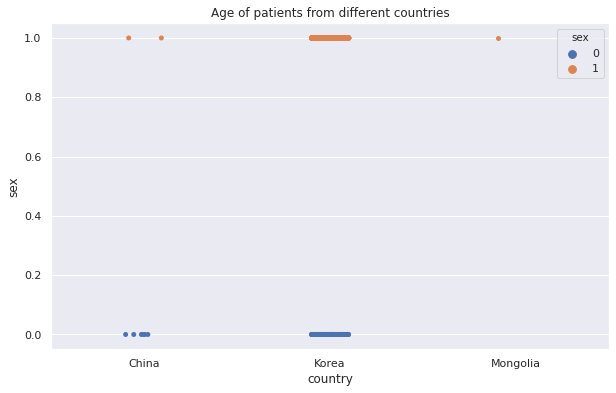

In [50]:
plt.figure(figsize=(10,6))
sns.stripplot(x=df.country, y=df.sex, hue=df.sex)
plt.title("Age of patients from different countries")
plt.show()

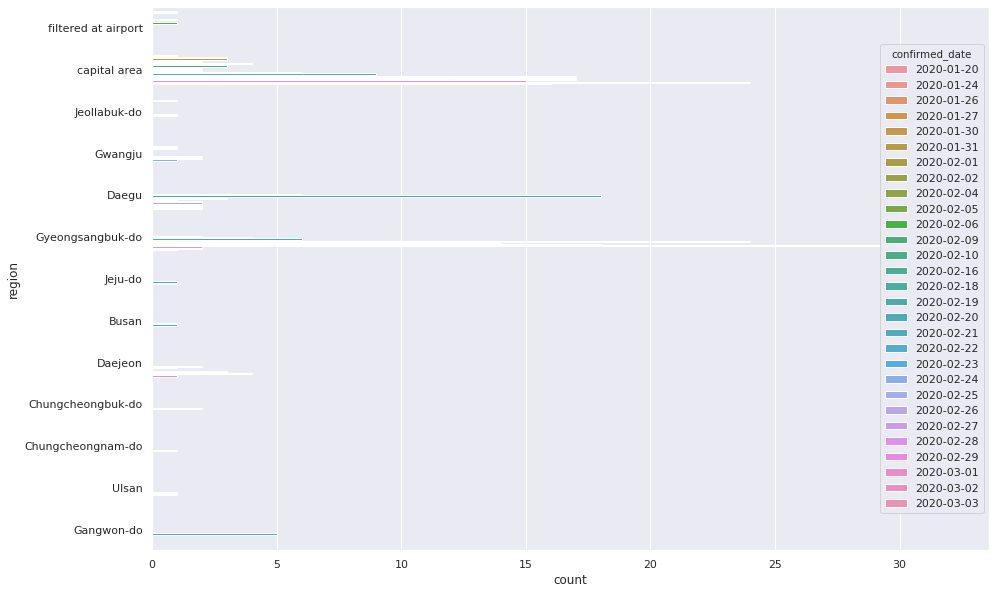

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(y='region',data=df, hue='confirmed_date');

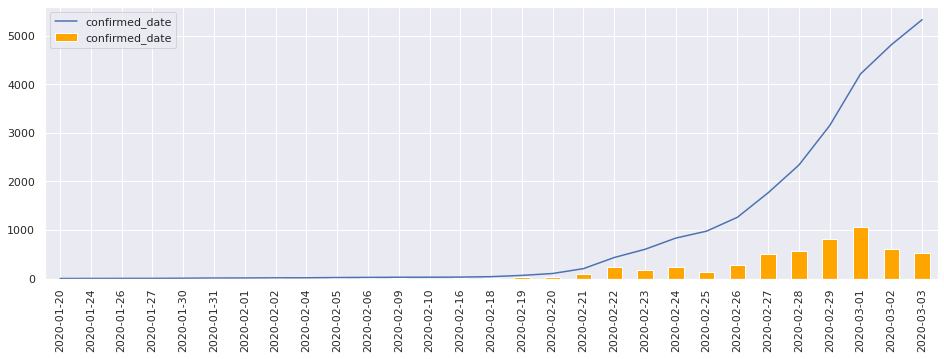

In [52]:
confirmed_patients_series = df['confirmed_date'].value_counts().sort_index()

confirmed_patients_series.cumsum().plot(legend='accumulated')
confirmed_patients_series.plot(kind='bar', color='orange', legend='daily', figsize=(16, 5), grid=True)

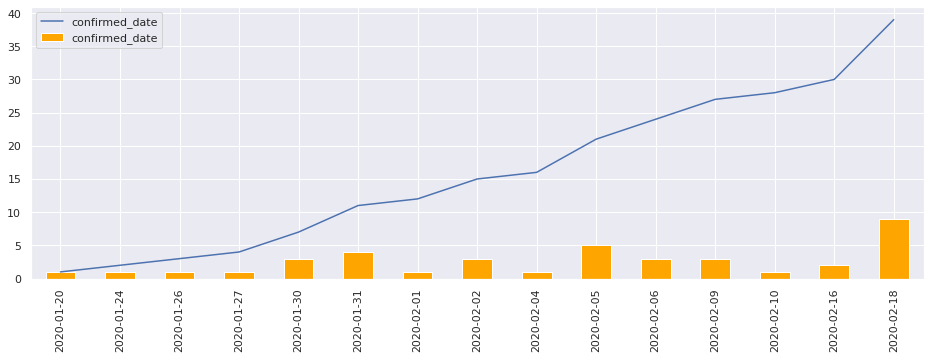

In [53]:
limit_series = confirmed_patients_series[:df[df['id'] == 31]['confirmed_date'].values[0]]
limit_series.cumsum().plot(legend='accumulated')
limit_series.plot(kind='bar', color='orange', legend='daily', figsize=(16, 5), grid=True)

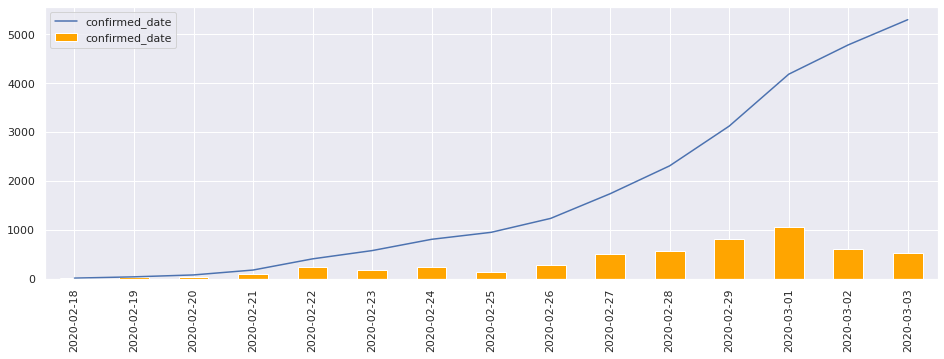

In [54]:
limit_series = confirmed_patients_series[df[df['id'] == 31]['confirmed_date'].values[0]:]
limit_series.cumsum().plot(legend='accumulated')
limit_series.plot(kind='bar', color='orange', legend='daily', figsize=(16, 5), grid=True)

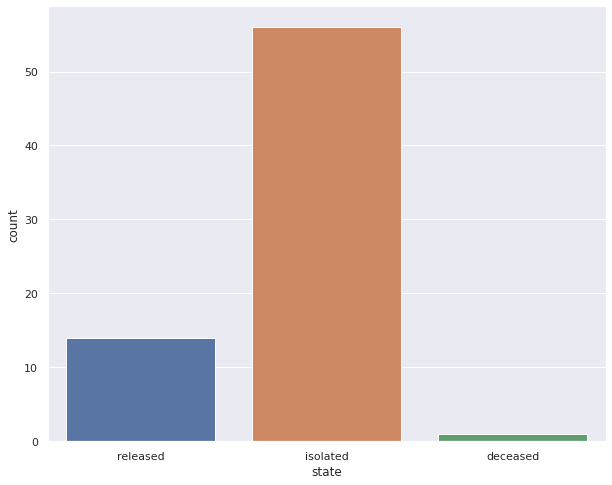

In [55]:
sns.countplot(x=df['state'].loc[(df['infection_reason']=='contact with patient')])

# Great Work Done!

**Ravjot Singh**

LinkedIn- https://www.linkedin.com/in/ravjot-singh-1a0777149/

Github- https://github.com/Ravjot03

E-mail- ravjot313@gmail.com

Phone- +91-9654446404
